In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# **Import Library &  Load dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CSV FILE FOR ML/Iris.csv')

# **Data Visualization** 

In [4]:
df.shape

(150, 6)

In [5]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#delete a colum
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 21.9 MB 147 kB/s
     |████████████████████████████████| 596 kB 8.2 MB/s 
     |████████████████████████████████| 102 kB 60.2 MB/s 
     |████████████████████████████████| 690 kB 41.0 MB/s 
     |████████████████████████████████| 4.7 MB 47.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 75.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=d7cfd52f1c77ad9017681121d8423297ca22432603f91bc19e6435d3a0910a6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-1fig4cbx/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=537e23f0564ee368f042a338569dfb002bac9b11d3afe4619cf603c851ebb312
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file(output_file='pd_profile.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#  **Preprocessing the Dataset**

In [11]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#  **Exploratory Data Analysis**

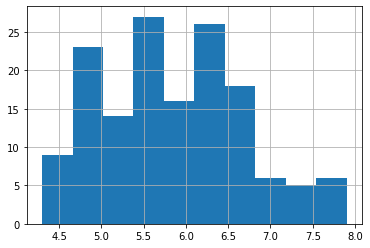

In [12]:
#histogram
df['SepalLengthCm'].hist()

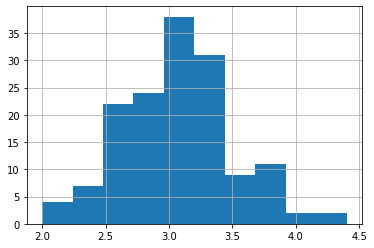

In [13]:
df['SepalWidthCm'].hist()

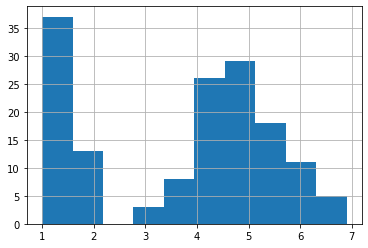

In [14]:
df['PetalLengthCm'].hist()

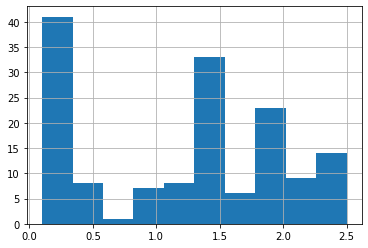

In [15]:
df['PetalWidthCm'].hist()

In [16]:

#scatterplot
colors = ['blue', 'orange', 'red']
Species= ['Iris-setosa','Iris-versicolor','Iris-virginica']

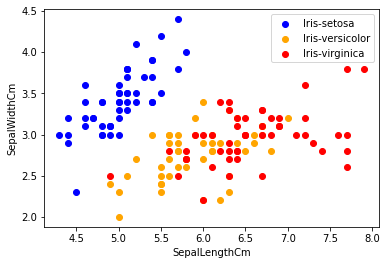

In [17]:
for i in range(3):
  x= df[df['Species'] == Species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label=Species[i])
plt.xlabel("SepalLengthCm") 
plt.ylabel("SepalWidthCm") 
plt.legend()

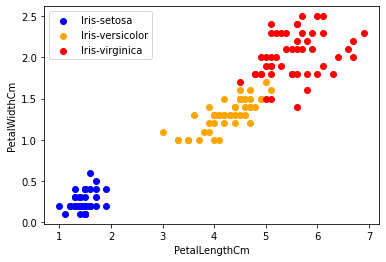

In [18]:
for i in range(3):
  x= df[df['Species'] == Species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label=Species[i])
plt.xlabel("PetalLengthCm") 
plt.ylabel("PetalWidthCm") 
plt.legend()

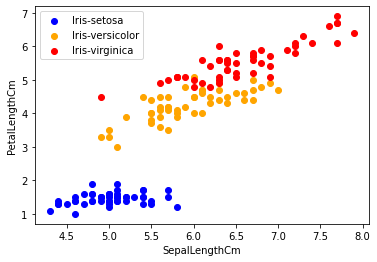

In [19]:
for i in range(3):
  x= df[df['Species'] == Species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = colors[i], label=Species[i])
plt.xlabel("SepalLengthCm") 
plt.ylabel("PetalLengthCm") 
plt.legend()

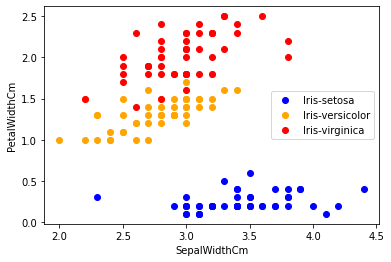

In [20]:
for i in range(3):
  x= df[df['Species'] == Species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c = colors[i], label=Species[i])
plt.xlabel("SepalWidthCm") 
plt.ylabel("PetalWidthCm") 
plt.legend()

# **Correlation Matrix**

In [21]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


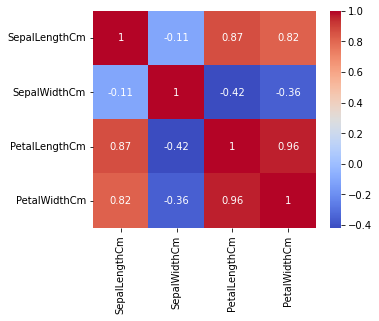

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap ='coolwarm')

#  **LABEL**

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Species_transformed = le.fit_transform(df['Species'])
df['Species']=Species_transformed
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)


# **Split The Dataset**

In [27]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [29]:
x=df.drop(columns=['Species'])

In [30]:
len(X_train)

112

In [31]:
len(X_test)

38

#  **Data Processing**

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_df_train = scaler.fit_transform(X_train)
standard_df_test = scaler.transform(X_test)

In [33]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
variance_df_train = selector.fit_transform(X_train)
variance_df_test = selector.transform(X_test)


##  **LogisticRegression**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      bayes = LogisticRegression(C = i )
      bayes.fit(standard_df_train, y_train)

      # predict using the trained model
      y_pred_train = bayes.predict(standard_df_train)
      y_pred_test = bayes.predict(standard_df_test)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

 alpha = 0.0001
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.2894736842105263
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.8571428571428571
Accuracy of testing data 0.7631578947368421
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.8839285714285714
Accuracy of testing data 0.7894736842105263
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.9017857142857143
Accuracy of testing data 0.8421052631578947
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.9553571428571429
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
---------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#  **naive_bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      bayes = GaussianNB(var_smoothing = i )
      bayes.fit(standard_df_train, y_train)

      # predict using the trained model
      y_pred_train = bayes.predict(standard_df_train)
      y_pred_test = bayes.predict(standard_df_test)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

 alpha = 0.0001
Accuracy of training data 0.9553571428571429
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.9553571428571429
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.9464285714285714
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.9375
Accuracy of testing data 0.9473684210526315
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.8839285714285714
Accuracy of testing data 0.868421052631579
--------------------------------------------------
----------------------------------------

##  **KNN**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in range(3,30,2):
      print('k = '+str(i))
      # train the model using the train data
      neigh = KNeighborsClassifier(n_neighbors=i)
      neigh.fit(standard_df_train, y_train)
 
      y_pred_test = neigh.predict(standard_df_test)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

k = 3
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
--------------------------------------------------
k = 5
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.9473684210526315
--------------------------------------------------
--------------------------------------------------
k = 7
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
--------------------------------------------------
k = 9
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
--------------------------------------------------
k = 11
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
--------------------------------------------------
k = 13
Accurac

##  **SVM with Classification**

In [37]:
from sklearn import svm
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      clf = svm.SVC(C = i)
      clf.fit(standard_df_train, y_train)

      # predict using the trained model
      y_pred_train = clf.predict(standard_df_train)
      y_pred_test = clf .predict(standard_df_test)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

 alpha = 0.0001
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.2894736842105263
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.2894736842105263
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.3482142857142857
Accuracy of testing data 0.2894736842105263
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.8839285714285714
Accuracy of testing data 0.868421052631579
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.9732142857142857
Accuracy of testing data 0.9736842105263158
--------------------------------------------------
----------------------------

##  **Linear Regression**

In [40]:
from sklearn.linear_model import LinearRegression
list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      linear = LinearRegression().fit(standard_df_train, y_train)

          # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)
     


 alpha = 0.0001
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 10
Accuracy of training data 1.0
Accuracy 

##  **Regression Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier
list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      regressor = DecisionTreeClassifier()
      regressor.fit(standard_df_train, y_train)

      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)
      

       

 alpha = 0.0001
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 1.0
Accuracy of testing data 0.9210526315789473
--------------------------------------------------
--------------------------------------------------
 alpha = 10
Accuracy of training data 1.0
Accuracy 